In [27]:
import numpy as np
from ad99 import AlexanderDunkerton1999
import matplotlib.pyplot as plt
ad99 = AlexanderDunkerton1999(source_level_height=9000,damp_top=True,dc=0.1,)

n_levels = 40 
z = np.linspace(0,50e3,n_levels)
H = 8e3
rho_0 = 1
N = 5e-2 * np.ones(n_levels)
rho = rho_0*np.exp(-z/H)
u = np.zeros(n_levels)

In [28]:
drag = ad99.gwd(u,N,z,rho) 

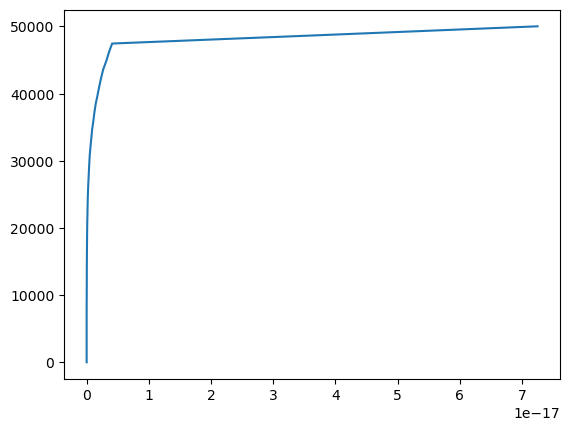

In [29]:
plt.plot(drag,z)

In [30]:
N_TIME = 365*5
dt = 3600*24
t = np.arange(0,N_TIME*dt,dt)
u = np.zeros((N_TIME,n_levels))
u[0] = 10*np.exp(-(z - 21e3)**2/5000**2)
drag = np.zeros((N_TIME,n_levels))
for i,t in enumerate(t[:-1]):
    drag[i] = ad99.gwd(u[i],N,z,rho)
    
    u[i+1] = u[i] + drag[i]*dt



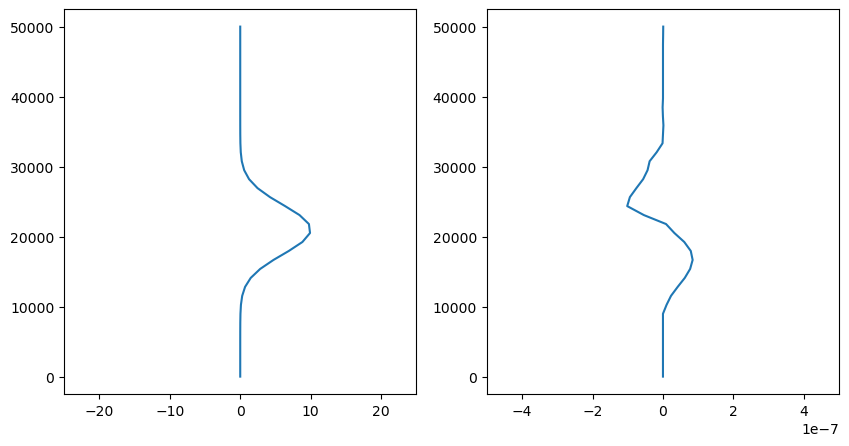

In [33]:
from matplotlib.animation import FuncAnimation

fig,(ax1,ax2) = plt.subplots(figsize=(10,5),ncols=2)
line, = ax1.plot(u[0],z)
line_drag, = ax2.plot(drag[i]*rho,z)    
ax1.set_xlim(-25,25)
ax2.set_xlim(-5e-7,5e-7)
def step(i):
    line.set_xdata(u[i])
    line_drag.set_xdata(drag[i]*rho)
    return line,line_drag

anim = FuncAnimation(fig,step,N_TIME,blit=True)

In [34]:
anim.save('gwd.mp4',fps=30)